In [1]:
#konlpy.tag 설치 / 텍스트 마이닝
!sudo apt-get install python3-dev; pip3 install konlpy


# window용 시각화 폰트 / 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
     |████████████████████████████████| 19.4 MB 50.4 MB/s 
     |████████████████████████████████| 448 kB 10.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.u

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#워드 클라우드 = 텍스트 마이닝
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [4]:
# 한글 폰트 plt 적용
plt.rc('font', family='NanumBarunGothic')

In [5]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/프로젝트/패캠 데이터_팀플/파이널프로젝트_RAW_210329_210926.xlsx')

In [53]:
# 상위 20% 구매액 고객의 총 결제금액 보기
maginot = df.groupby('customer_id').sum()['transaction_amount'].sort_values(ascending = False).values[0 : round((df.shape[0])*0.2)][-1] # 20% 마지노선
df.groupby('customer_id').sum()['transaction_amount'].sort_values(ascending = False) > maginot 

customer_id
116416.0     True
512983.0     True
592788.0     True
548381.0     True
594969.0     True
            ...  
166684.0    False
141765.0    False
282430.0    False
388238.0    False
140373.0    False
Name: transaction_amount, Length: 53753, dtype: bool

In [ ]:
df.isna().sum() / df.shape[0] * 100

id                         0.000000
customer_id                0.002846
course_id                  4.939337
type                       0.000000
state                      0.000000
course_title               0.015178
category_title             0.022766
format                     0.015178
completed_at               0.000000
transaction_amount         0.000000
coupon_title              69.818534
coupon_discount_amount    69.818534
sale_price                 1.070016
tax_free_amount            1.070016
pg                        14.300079
method                    12.422808
subcategory_title         18.809702
marketing_start_at        17.054800
dtype: float64

### 쿠폰 사용자의 비율

Text(0.5, 1.0, ' 쿠폰 사용자 비율')

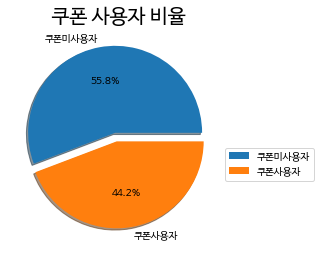

In [ ]:
coup_had = df3.loc[df3['coupon_discount_amount'] > 0, 'coupon_discount_amount'].count() # 쿠폰을 사용한 사람의 수
coup_not = df3.loc[df3['coupon_discount_amount'] == 0, 'coupon_discount_amount'].count() # 쿠폰을 사용하지 않은 사람의 수
pie_series = pd.Series([coup_not, coup_had], index = ['쿠폰미사용자', '쿠폰사용자'])
explode = pd.Series([0.05, 0.05], index = pie_series.index)
plt.pie(pie_series, labels = pie_series.index, autopct = '%.1f%%', shadow = True, explode = explode )
plt.legend(loc = (1, 0.3))
plt.title(' 쿠폰 사용자 비율', size = 20)

Text(0, 0.5, '평균구매액')

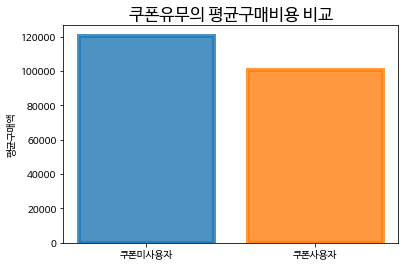

In [ ]:
coup_trans = df3.loc[df3['coupon_discount_amount'] > 0, 'transaction_amount'].mean() # 쿠폰사용자의 평균구매비용(할인액 포함)
notcoup_trans = df3.loc[df3['coupon_discount_amount'] == 0, 'transaction_amount'].mean() # 쿠폰미사용자의 평균구매비용
plt.bar(['쿠폰미사용자','쿠폰사용자'],[notcoup_trans, coup_trans], color = ['C0','C1'],edgecolor =  ['C0','C1'], alpha = 0.8, linewidth = 4)
plt.title('쿠폰유무의 평균구매비용 비교', fontsize = 17)
plt.ylabel('평균구매액')

In [ ]:
df3[df3['coupon_discount_amount'] == 0]['method'].value_counts().to_frame('쿠폰을 사용하지 않은 고객들의 결제 수단')

,쿠폰을 사용하지 않은 고객들의 결제 수단
CARD,22299
POINT,4639
VBANK,1753
TRANSFER,703
TRANS,384
ONSITE,117
PROMOTION,13
VOUCHER,5


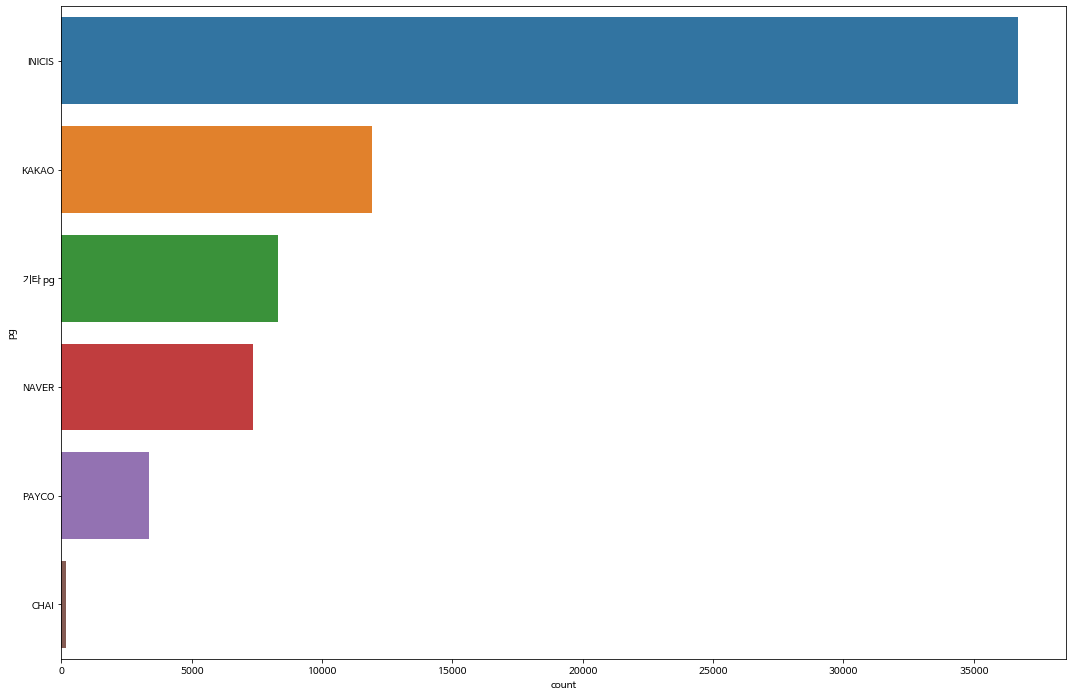

In [ ]:
# pg별 비율 시각화

fig = plt.figure(figsize = (18,12))
sns.countplot( y = df3['pg'], order = df3['pg'].value_counts().index)

In [ ]:
# df3 / transaction_amount 내림차순 정렬
df3.sort_values('transaction_amount', axis = 0, ascending = False,
               inplace = True, na_position = 'last')

In [ ]:
# 0 이상의 transaction_amount 값 출력 = 판매량(환불값 포함)
pay = df3[df3['transaction_amount'] > 0]
pay

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,0.0,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,0.0,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
sum_pay = pay['transaction_amount'].sum()

In [ ]:
# 총 판매량
print("총 금액은 ",int(sum_pay), "원 입니다.") 

총 금액은  6613452713 원 입니다.


In [ ]:
# 오름차순 기준 80퍼센트 기준 금액(상위 20%)
pay['transaction_amount'].quantile(q=0.8, interpolation='nearest')

172400.0

같은 id로 재구매한 사람이 있을까?(궁금)

In [ ]:
# customer_id 기준으로 내림차순 정렬(중복 값 확인 위함)
df3.sort_values('customer_id', axis = 0, ascending = True,
               inplace = True, na_position = 'last')

In [ ]:
# 중복되는 값만 보자

regular = df3.customer_id.value_counts().loc[df3.customer_id.value_counts() > 1].index
df3.loc[df3.customer_id.isin(regular)]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
22871,1039780.0,47.0,203078.0,PAYMENT,COMPLETED,올인원 패키지 : 딥러닝을 활용한 추천시스템 구현,데이터사이언스,올인원,2021-04-29 18:32:15,139500.0,NaN,0.0,139500.0,KAKAO,POINT,딥러닝/인공지능,2020-10-13
71084,1206695.0,47.0,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-07-09 16:14:40,104000.0,NaN,0.0,104000.0,KAKAO,POINT,머신러닝,2021-01-05
101935,1344225.0,153.0,203076.0,PAYMENT,COMPLETED,올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석,데이터사이언스,올인원,2021-09-13 11:16:52,139000.0,NaN,0.0,139000.0,INICIS,CARD,데이터분석,2020-09-11
96894,1322793.0,153.0,206044.0,PAYMENT,COMPLETED,올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드,데이터사이언스,올인원,2021-08-31 23:57:29,219000.0,NaN,0.0,219000.0,INICIS,CARD,머신러닝,2021-07-26
102899,1348577.0,153.0,203355.0,PAYMENT,COMPLETED,올인원 패키지 : 처음부터 시작하는 딥러닝 유치원,데이터사이언스,올인원,2021-09-15 22:07:47,159000.0,NaN,0.0,159000.0,INICIS,CARD,딥러닝/인공지능,2021-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105277,1364355.0,670488.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-09-24 19:20:26,133000.0,[미래투자금] 온라인 강의 1만원 할인쿠폰,10000.0,143000.0,NAVER,CARD,UX/UI,2021-03-11
105328,1364585.0,670621.0,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-09-24 23:24:55,148000.0,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,168000.0,INICIS,CARD,DevOps,2021-07-28
105338,1364638.0,670621.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 00:32:50,179000.0,NaN,0.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105343,1364689.0,670686.0,202609.0,PAYMENT,COMPLETED,올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작,프로그래밍,올인원,2021-09-25 02:00:22,137000.0,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,157000.0,INICIS,CARD,게임,2020-05-21


In [ ]:
# 중복값 제외한 수치
df3.drop_duplicates('customer_id')

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105408,1364956,545804.0,NaN,PAYMENT,COMPLETED,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),디자인,올인원,2021-09-25 13:25:49,1800000,NaN,NaN,1800000.0,295200.0,INICIS,CARD,NaN,NaT
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


### 텍스트 마이닝

In [ ]:
text = ''.join(s for s in df3['course_title'])

text

'시크릿코드 : 프론트엔드 실무 완성편올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX초격차 패키지 : 한번에 끝내는 영상 촬영과 편집올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)초격차 패키지 : 한 번에 끝내는 프론트엔드 개발프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스)The RED : 현실 세상의 TDD by 이규원올인원 패키지 : 마디아의 UX/UI 포트폴리오올인원 패키지 : 100억을 움직이는 단 10장의 PPT연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+초격차 패키지 : 한번에 끝내는 모션그래픽올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문THE RED : 광고인 박웅현과 크리에이티브데이터분석 프로젝트+자격증 온라인 완주반 3기초격차 패키지 : 한 번에 끝내는 프론트엔드 개발초격차 패키지 : 한번에 끝내는 모션그래픽올인원 패키지 : 디지털 마케팅 MAX 2020초격차 패키지 : 한번에 끝내는 PPT 제작/디자인프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스)초격차 패키지 : 한 번에 끝내는 엑셀 실무데이터분석 프로젝트+자격증 온라인 완주반 3기프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스)초격차 패키지 : 한 번에 끝내는 프론트엔드 개발올인원 패키지 : Android 앱 개발초격차 패키지 : 한 번에 끝내는 반복 업무 자동화올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식올인원 패키지 : 파이썬 웹 개발The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX초격차 패키지 : 한번에 끝내는 UX/UI 디자인올인원 패키지 : C++ 실력완성THE RED : 광고인 박웅현과 크리에이티브초격차 패키지 : 한 번에 끝내는 프론트엔드 개발초격차 패키지 : 한번에 끝내는 UX/UI 디자인초격차 패키지 : 한 번에 끝내는 반복 업무 자동화The RED : 

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [ ]:
text = text.replace('올인원','').replace('패키지','').replace('프로모션','').replace('온라인','')

In [ ]:
text_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Toy Project/데이터(new_format).txt', index = False)

In [ ]:
text_df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toy Project/데이터(new_format).txt')

In [ ]:
text_df_test

,format,new_format
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,패키지 : 알고리즘 기술면접 완전 정복
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집
2,시크릿코드 : 프론트엔드 실무 완성편,시크릿코드 : 프론트엔드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,시크릿코드 : 프론트엔드 실무 완성편
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,패키지 : 직장인 필수 스킬 3종 세트 MAX
...,...,...
105398,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기
105399,부동산 디벨로퍼 아카데미 : 인허가,부동산 디벨로퍼 아카데미 : 인허가
105400,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기
105401,부동산 디벨로퍼 아카데미 : 인허가,부동산 디벨로퍼 아카데미 : 인허가


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Toy Project/데이터(new_format).txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

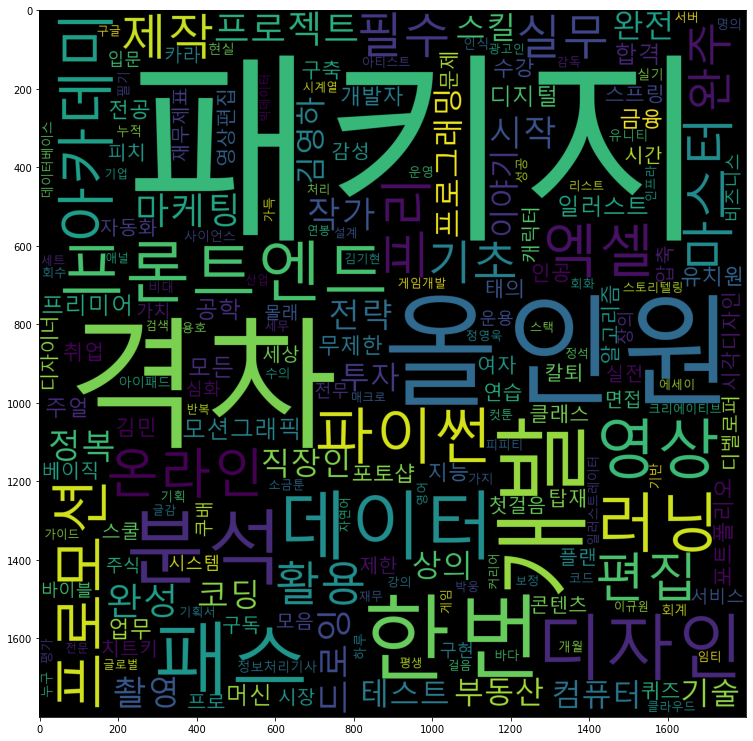

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Toy Project/MALGUN.TTF', width=1800, height=1800, scale=1.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(27,13))
plt.imshow(gen)